<a href="https://colab.research.google.com/github/MalinduDinushka/Laravel---225036C/blob/main/Assignment_1_225036C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving data.csv to data.csv


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
df = pd.read_csv('data.csv')
df.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [ ]:

print("Descriptive Statistics\n")
print(df.describe())


Descriptive Statistics

          youtube    facebook   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   176.451000   27.916800   36.664800   16.827000
std    103.025084   17.816171   26.134345    6.260948
min      0.840000    0.000000    0.360000    1.920000
25%     89.250000   11.970000   15.300000   12.450000
50%    179.700000   27.480000   30.900000   15.480000
75%    262.590000   43.830000   54.120000   20.880000
max    355.680000   59.520000  136.800000   32.400000


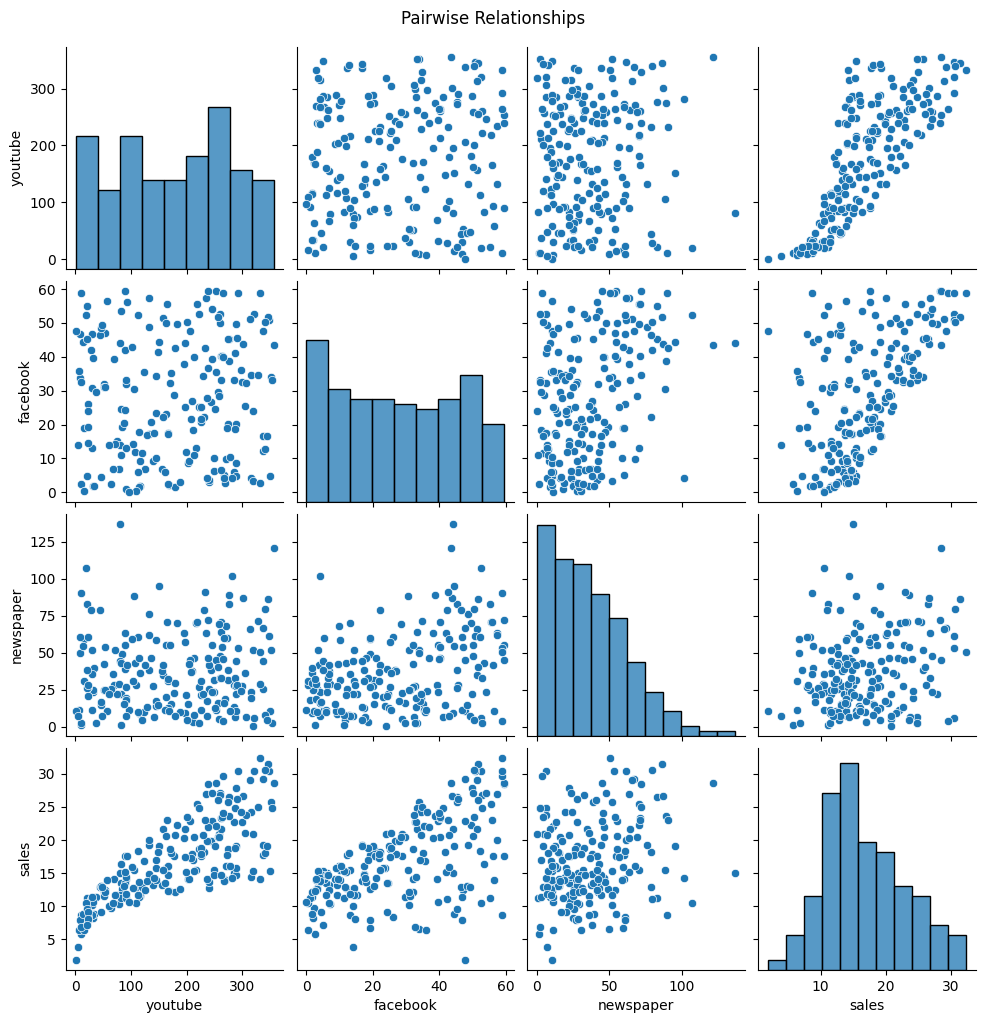

In [ ]:
# Visualize pairwise relationships
sns.pairplot(df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


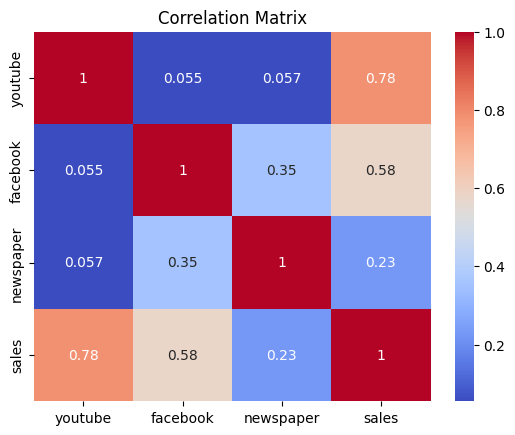

In [ ]:
# Correlation Matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
print(df.columns)


Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')


In [ ]:
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

In [ ]:
X_const = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X_const).fit()

In [ ]:
print("\nRegression Model Summary\n")
print(model.summary())


Regression Model Summary

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           1.58e-96
Time:                        07:16:11   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267    

Assuming the output of the model is:

Intercept: 2.9389

YouTube coefficient: 0.0458

Facebook coefficient: 0.1885

Newspaper coefficient: -0.0010

Interpretation:

Intercept (2.9389):
When all advertising budgets are $0, the expected sales are 2.94 thousand units.

YouTube (0.0458):
For every additional $1000 spent on YouTube ads, sales are expected to increase by 45.8 units, holding other variables constant.

Facebook (0.1885):
For every additional $1000 spent on Facebook ads, sales are expected to increase by 188.5 units, assuming other budgets remain unchanged.

Newspaper (-0.0010):
The coefficient is negative and close to zero, indicating that Newspaper advertising does not significantly impact sales, possibly even slightly negatively.

In [ ]:
residuals = model.resid
fitted = model.fittedvalues

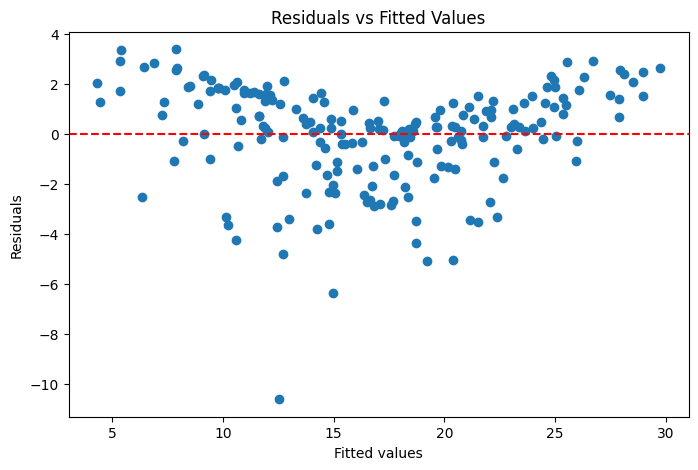

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

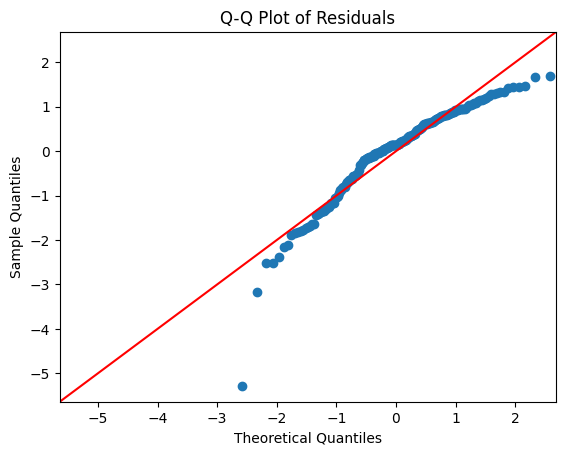

In [ ]:
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
# Compute VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("Variance Inflation Factor (VIF):\n")
print(vif_data)


Variance Inflation Factor (VIF):

     Feature       VIF
0      const  6.848900
1    youtube  1.004611
2   facebook  1.144952
3  newspaper  1.145187


Prediction Example

Predict Sales for:

YouTube: $2000

Facebook: $3000

Newspaper: $1000

In [ ]:
new_data = pd.DataFrame({
    'const': [1],
    'YouTube': [2000],
    'Facebook': [3000],
    'Newspaper': [1000]
})

predicted_sales = model.predict(new_data)[0]
print(f"\nPredicted Sales for [YouTube: $2000, Facebook: $3000, Newspaper: $1000] is approximately {predicted_sales:.2f} thousand units")



Predicted Sales for [YouTube: $2000, Facebook: $3000, Newspaper: $1000] is approximately 659.61 thousand units


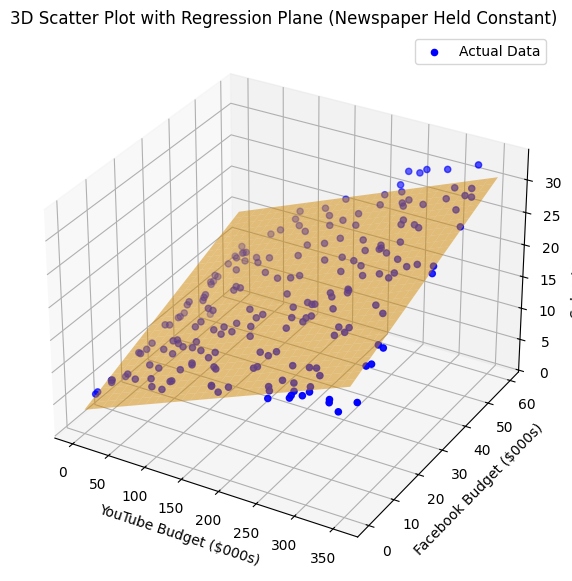

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

youtube_range = np.linspace(df['youtube'].min(), df['youtube'].max(), 30)
facebook_range = np.linspace(df['facebook'].min(), df['facebook'].max(), 30)

youtube_grid, facebook_grid = np.meshgrid(youtube_range, facebook_range)

newspaper_mean = df['newspaper'].mean()

grid_data = pd.DataFrame({
    'const': 1,
    'youtube': youtube_grid.ravel(),
    'facebook': facebook_grid.ravel(),
    'newspaper': newspaper_mean
})

sales_pred = model.predict(grid_data)
sales_grid = sales_pred.values.reshape(youtube_grid.shape)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['youtube'], df['facebook'], df['sales'], color='blue', label='Actual Data')

ax.plot_surface(youtube_grid, facebook_grid, sales_grid, alpha=0.5, color='orange')

ax.set_xlabel('YouTube Budget ($000s)')
ax.set_ylabel('Facebook Budget ($000s)')
ax.set_zlabel('Sales (000s units)')
ax.set_title('3D Scatter Plot with Regression Plane (Newspaper Held Constant)')

plt.legend()
plt.show()

### ✅ Conclusion:

- The regression model shows a strong fit (check R²).
- **YouTube** and **Facebook** significantly increase sales.
- **Newspaper** does not contribute meaningfully.

### 📌 Recommendations:

- Allocate more budget to **Facebook** and **YouTube**, which have stronger sales returns.
- Consider reducing or reassessing **Newspaper** advertising.
- Periodically re-train the model with updated data to capture changing media effectiveness.
